In [1]:
# we see this kind of implementation in canva

In [2]:
import matplotlib.pyplot as plt
import cv2

In [40]:
img = cv2.imread('/content/WhatsApp Image 2024-07-30 at 19.34.10.jpeg')

In [41]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # To get the image in RGB format instead of BGR

In [42]:
print(img.shape)

(1599, 1599, 3)


In [45]:
img = cv2.resize(img,(400,300))

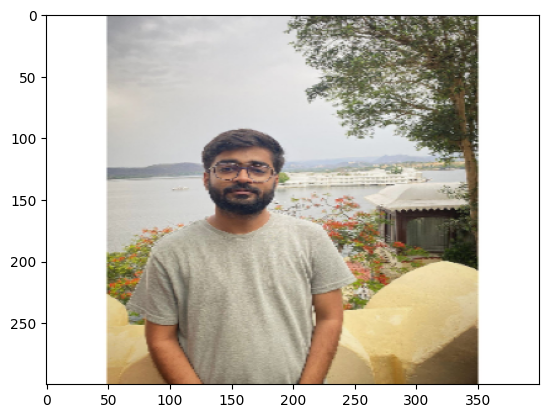

In [46]:
plt.imshow(img)
plt.show()

In [47]:
X = img.reshape((-1,3))
X.shape

(120000, 3)

In [49]:
from sklearn.cluster import KMeans

In [77]:
k = 10
model = KMeans(n_clusters = k)

model.fit(X)

KMeans(n_clusters=10)

In [78]:
centroids = model.cluster_centers_

In [79]:
centroids

array([[254.90510726, 254.88955163, 254.75070322],
       [176.00269107, 127.74560459,  81.0943667 ],
       [ 61.75352836,  56.62471132,  43.01218886],
       [206.32330242, 204.68629613, 199.19437058],
       [187.68372753, 183.75052034, 170.44853359],
       [104.92224643,  91.87064184,  66.60320919],
       [134.99848312, 129.21337378, 111.5947415 ],
       [221.63128023, 221.41405998, 220.38174782],
       [168.82629578, 160.01961177, 139.54862918],
       [224.54390564, 202.06107471, 146.96356488]])

In [80]:
import numpy as np

In [81]:
colors = np.array(centroids,dtype='uint8')

In [82]:
print(colors)

[[254 254 254]
 [176 127  81]
 [ 61  56  43]
 [206 204 199]
 [187 183 170]
 [104  91  66]
 [134 129 111]
 [221 221 220]
 [168 160 139]
 [224 202 146]]


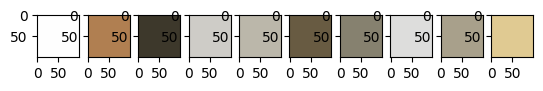

In [83]:
# Color Patches
i = 1
for color in colors:
  #print(colors)
  plt.subplot(1,k,i)
  #plt.axis('off')
  i = i+1
  mat = np.zeros((100,100,3),dtype = 'uint8')
  mat[:,:,:] = color
  plt.imshow(mat)
plt.show()

In [84]:
# Basic Segmentation based upon similar color regions
# Segmentation partitions an image into regions
# having similar visual appearance corresponding to parts of the object

In [85]:
print(colors)

[[254 254 254]
 [176 127  81]
 [ 61  56  43]
 [206 204 199]
 [187 183 170]
 [104  91  66]
 [134 129 111]
 [221 221 220]
 [168 160 139]
 [224 202 146]]


In [86]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [87]:
newImg = np.zeros((X.shape),dtype = 'uint8')
print(newImg.shape)

(120000, 3)


In [88]:
for i in range(newImg.shape[0]):
  newImg[i] = colors[model.labels_[i]]

In [89]:
newImg = newImg.reshape((img.shape))

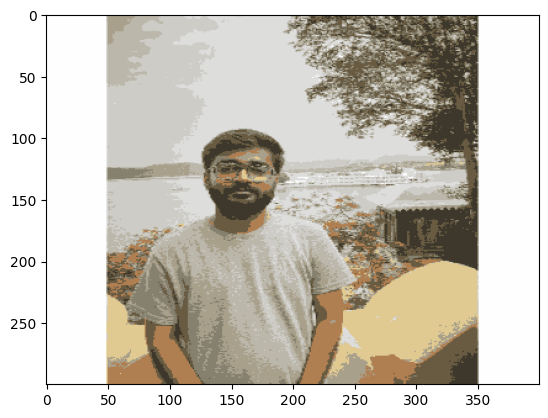

In [90]:
plt.imshow(newImg)
plt.show()